In [1]:
%matplotlib inline
# First import useful data handling libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning Algorithms
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Loading data 
train = pd.read_csv("../data/train.csv")
test  = pd.read_csv("../data/test.csv")

In [3]:
# Data checking and cleaning
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#### Since PassengerId is just an id from 1 to 891 for each passenger. So we just ignore that column cause it would 
#### not affect our analysis.  
#### Most values for column Cabin were missing, and this variable should be closely related to Fare 
#### and Pclass, so we also delete that column. 

In [7]:
del train['Cabin']
del test['Cabin']
del train['PassengerId']

In [8]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [10]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [11]:
#### Variable Ticket has 681 Unique values and it contains both numeric values and Alphanumeric Values. So it would not 
#### help in the model. We could delete this column.

In [12]:
del train['Ticket']
del test['Ticket']

In [13]:
#### Now we want to check whether Pclass and Fare are highly correlated cause usually higher ticket class costs more.

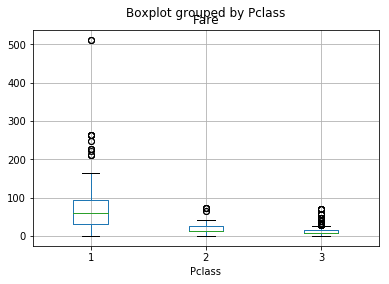

In [14]:
pd.DataFrame.boxplot(train,column='Fare', by='Pclass')

In [15]:
#### We can see that Fare for Pclass1 is significantly higher than 2 and 3. But the difference between 2 and 3 are not
#### very significant. So I decide to keep both variables in our model. 

In [16]:
#### For variables SibSp and Parch, these are # of siblings / spouses aboard the Titanic and # of parents / children aboard 
#### the Titanic respectively. We could create a variable FamilyNumber to demonstrate the sum of these two.

In [17]:
train['FamilyNumber'] = train['SibSp'] + train['Parch']
test['FamilyNumber'] = test['SibSp'] + test['Parch']

In [18]:
####Change sex variable from 'male', 'female' into '1', '0' for modeling.
train['Sex'] = train['Sex'].map({'male':1,'female':0})
test['Sex'] = test['Sex'].map({'male':1,'female':0})

In [19]:
#### Now we deal with the names cause the information about social status in names could be an useful variable in 
#### out model. 
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = test[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
test['Title'] = title['Title']

title = pd.DataFrame()
title[ 'Title' ] = train[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
train['Title'] = title['Title']

count= pd.crosstab(index=title['Title'],  columns="count")
count.sort_values(by='count',ascending=False)

col_0,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Major,2
Col,2
Mlle,2


In [20]:
#### Since Mr, Miss, Mrs, and Master took up almost all the count in title, we could groupup other rate titles into 'Rare'
train.ix[((train.Title!='Mr') & (train.Title!='Mrs') &(train.Title!='Miss') &(train.Title!='Master') ),'Title'] = 'Rare'
test.ix[((test.Title!='Mr') & (test.Title!='Mrs') &(test.Title!='Miss') &(test.Title!='Master') ),'Title'] = 'Rare'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
## Filling missing values

In [22]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyNumber,Title
61,1,1,"Icard, Miss. Amelie",0,38.0,0,0,80.0,NaN,0,Miss
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,80.0,NaN,0,Mrs


In [23]:
#### There are just 2 missing values of Embarked, we would just fill in that with the most common value
train.Embarked.fillna('S',inplace=True)
test.Embarked.fillna('S',inplace=True)

In [24]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyNumber,Title
152,1044,3,"Storey, Mr. Thomas",1,60.5,0,0,NaN,S,0,Mr


In [25]:
#### There are just 1 missing value of Fare in test dataset, we simply fill that with mean
test.Fare.fillna(test.Fare.mean(),inplace=True)

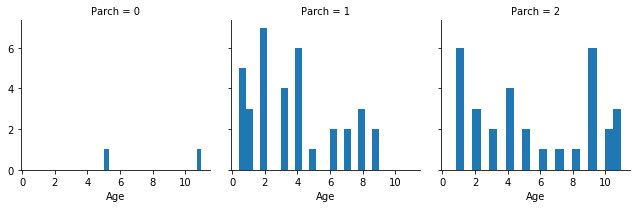

In [26]:
#### One important missing value we have to fill is age. We will not simply fill in the median or mean of the age column but use
#### other variables like Parch and Title to get more accurate information.
child = train[train['Age'] <12] [['Name','Age','Parch']]
g = sns.FacetGrid(child, col='Parch')
g.map(plt.hist, 'Age', bins=20)

In [27]:
#### We could see from this graph that it is almost impossible for an infant or little child to travel on Titanic along. 
#### So we could assume that if the passenger whose age is missing and traveling along is adult. We would use the 
#### mean age of the adults to fill in those missing value.
adult = train[train['Age'] > 12]
adultMean = adult.Age.mean()
child = train[train['Age'] <= 12]
childMean = child.Age.mean()
allMean = train.Age.mean()
train.Age.fillna(-1,inplace=True)
train.ix[((train.Age==-1) & (train.Parch==0) ),'Age'] = adultMean
#### After that we fill in mean age of children for those title are 'Master' which means boys and young men

train.ix[((train.Age==-1) & (train.Title =='Master') ),'Age'] = childMean

#### For the left we just fill up with mean age of all training group
train.ix[train.Age==-1,'Age'] = allMean

In [28]:
#### Do the same thing for test group
adult = test[test['Age'] > 12]
adultMean = adult.Age.mean()
child = test[test['Age'] <= 12]
childMean = child.Age.mean()
allMean = test.Age.mean()
test.Age.fillna(-1,inplace=True)
test.ix[((test.Age==-1) & (test.Parch==0) ),'Age'] = adultMean
#### After that we fill in mean age of children for those title are 'Master' which means boys and young men

test.ix[((test.Age==-1) & (test.Title =='Master') ),'Age'] = childMean

#### For the left we just fill up with mean age of all testing group
test.ix[test.Age==-1,'Age'] = allMean

In [29]:
#### Convert Title and Embarked to Integers
train['Title'] = train['Title'].map({'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5})
test['Title'] = test['Title'].map({'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5})
train['Embarked'] = train['Embarked'].map({'S':1,'C':2,'Q':3})
test['Embarked'] = test['Embarked'].map({'S':1,'C':2,'Q':3})

In [30]:
#### Finally we delete column Name, SibSp, and Parch
del train['Name']
del test['Name']
del train['SibSp']
del test['SibSp']
del train['Parch']
del test['Parch']
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyNumber,Title
0,0,3,1,22.0,7.2500,1,1,1
1,1,1,0,38.0,71.2833,2,1,3
2,1,3,0,26.0,7.9250,1,0,2
3,1,1,0,35.0,53.1000,1,1,3
4,0,3,1,35.0,8.0500,1,0,1


In [31]:
## Applying Modeling

In [32]:
#### This question is the kind of question like Classification and regression problem. So we would try 
#### Random Forest, Logistic Regression, Decision Tree and KNN. 

In [33]:
train_X = train.drop('Survived',axis=1)
train_Y = train['Survived']
test_X  = test.drop("PassengerId", axis=1).copy()

In [34]:
#### First we try Random Forest Method
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(train_X,train_Y)
randomforestY = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)

0.98428731762065091

In [35]:
#### Now we try Logistic Regression
logreg = LogisticRegression()
logreg.fit(train_X, train_Y)
logregY = logreg.predict(test_X)
logreg.score(train_X, train_Y)

0.81369248035914699

In [36]:
#### Try K Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_Y)
knnY = knn.predict(test_X)
round(knn.score(train_X, train_Y) * 100, 2)

85.069999999999993

In [37]:
#### Try Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)
decisiontreeY = decision_tree.predict(test_X)
round(decision_tree.score(train_X, train_Y) * 100, 2)

98.430000000000007

In [38]:
#### After comparing the models we tried, the random forest model would fits our model best. And that is true based on the score
#### we get from Keggle. We scored 0.77511 and around the middle of the leader board. This analysis could be further analyzed 
#### if we dig more in the variable selection and filling missing data. For example, we could try divide age into groups since 
#### it is the age group that matters. A 2 year old and 3 year old would not make much difference in surviving. We could also
#### discover more about Cabin since the position you were would affect the surviving. 
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = randomforestY
df_output[['PassengerId','Survived']].to_csv('../output/output.csv',index=False)